# Première partie : Classification uni-label

Pour cette première partie, il s'agit de classifier si un arbre a un défaut ou non. 


# 1er modèle : Réseaux de Neurones

In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for jax: filename=jax-0.4.8-py3-none-any.whl size=1439795 sha256=92016db1c96de244b65d35dc6651e6fb0c9d180eb894a87830bf72aeae6904b6
  Stored in directory: c:\users\285748\appdata\local\pip\cache\wheels\45\83\1e\3db22c5e1941c10e41c4f5cdf829b0a358146d4d0733d4a105
Successfully built jax


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [2]:
#Chargement des données
data = pd.read_csv('donnees-defi-egc.csv')
print("Nombre de lignes : " , data.shape[0])
print("Nombre de variables : ",data.shape[1] )
data.head()

Nombre de lignes :  15375
Nombre de variables :  34


,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,...,TYPEIMPLANTATIONPLU,VARIETE,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014,2019,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,...,?,?,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013,?,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,...,?,?,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
2,3,2004,?,2014,ESP26205,ESP635,Pl R Frappat ang Eaux Claires,10 à 20 cm,grandiflora,passages fréquents ou arrêts,...,?,?,vigoureux,1.913087e+06,4.223524e+06,0,0,0,0,0
3,2,2004,2014,2014,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,...,?,?,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013,?,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,...,?,?,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0


In [3]:
data = data.replace('?', np.nan)

In [4]:
missing_values= data.isnull().sum()
print(missing_values)

ADR_SECTEUR                       0
ANNEEDEPLANTATION                 0
ANNEEREALISATIONDIAGNOSTIC        8
ANNEETRAVAUXPRECONISESDIAG     4511
CODE                              0
CODE_PARENT                       0
CODE_PARENT_DESC                  0
DIAMETREARBREAUNMETRE            67
ESPECE                         1018
FREQUENTATIONCIBLE                1
GENRE_BOTA                        0
IDENTIFIANTPLU                15014
INTITULEPROTECTIONPLU         15014
NOTEDIAGNOSTIC                   40
PRIORITEDERENOUVELLEMENT        127
RAISONDEPLANTATION            15145
REMARQUES                     11176
SOUS_CATEGORIE                    0
SOUS_CATEGORIE_DESC               0
STADEDEDEVELOPPEMENT             51
STADEDEVELOPPEMENTDIAG           13
TRAITEMENTCHENILLES           14287
TRAVAUXPRECONISESDIAG          4525
TROTTOIR                          0
TYPEIMPLANTATIONPLU           15014
VARIETE                       13212
VIGUEUR                          11
coord_x                     

In [5]:
columns_to_drop = ['IDENTIFIANTPLU','INTITULEPROTECTIONPLU','RAISONDEPLANTATION','REMARQUES','TYPEIMPLANTATIONPLU','VARIETE','TRAITEMENTCHENILLES']
data.dropna(subset=["ANNEEREALISATIONDIAGNOSTIC"], inplace=True)
data.drop(columns_to_drop, axis=1, inplace=True)
data.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,...,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014,2019,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,...,Controle,non,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013,NaN,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,...,NaN,non,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
3,2,2004,2014,2014,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,...,Taille mise en sécurité,oui,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013,NaN,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,...,NaN,oui,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0
5,3,2004,2015,2018,ESP11866,ESP872,Pc Ch Elysés Ouest,40 à 50 cm,abies,passages fréquents et arrêts fréquents,...,Controle résistographe,non,vigoureux,1.912600e+06,4.222098e+06,1,1,0,0,0


In [6]:
missing_values= data.isnull().sum()
print(missing_values)

ADR_SECTEUR                      0
ANNEEDEPLANTATION                0
ANNEEREALISATIONDIAGNOSTIC       0
ANNEETRAVAUXPRECONISESDIAG    4509
CODE                             0
CODE_PARENT                      0
CODE_PARENT_DESC                 0
DIAMETREARBREAUNMETRE           66
ESPECE                        1017
FREQUENTATIONCIBLE               1
GENRE_BOTA                       0
NOTEDIAGNOSTIC                  40
PRIORITEDERENOUVELLEMENT       127
SOUS_CATEGORIE                   0
SOUS_CATEGORIE_DESC              0
STADEDEDEVELOPPEMENT            51
STADEDEVELOPPEMENTDIAG          12
TRAVAUXPRECONISESDIAG         4524
TROTTOIR                         0
VIGUEUR                         10
coord_x                          0
coord_y                          0
DEFAUT                           0
Collet                           0
Houppier                         0
Racine                           0
Tronc                            0
dtype: int64


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
# Créez un DataFrame sans les lignes ayant des valeurs manquantes pour 'ANNEETRAVAUXPRECONISESDIAG'
data_complete = data.dropna(subset=['ANNEETRAVAUXPRECONISESDIAG'])

In [9]:
# On sépare les données en deux parties : 
# L'une pour les lignes avec des valeurs manquantes pour 'ANNEETRAVAUXPRECONISESDIAG'
# L'autre pour les lignes sans valeurs manquantes pour 'ANNEETRAVAUXPRECONISESDIAG'
data_missing = data[data['ANNEETRAVAUXPRECONISESDIAG'].isna()]

In [10]:
# Préparez les données pour l'entraînement et la prédiction
X_complete = data_complete[['ANNEEDEPLANTATION', 'ANNEEREALISATIONDIAGNOSTIC']]
y_complete = data_complete['ANNEETRAVAUXPRECONISESDIAG']
X_missing = data_missing[['ANNEEDEPLANTATION', 'ANNEEREALISATIONDIAGNOSTIC']]

In [11]:
# Entraînez un modèle de régression linéaire
reg = LinearRegression()
reg.fit(X_complete, y_complete)

LinearRegression()

In [12]:
predicted_values = reg.predict(X_missing)

In [13]:
# On arrondi les valeurs prédites à l'entier le plus proche
predicted_values_rounded = np.round(predicted_values)

In [14]:
# On remplace les valeurs manquantes dans le DataFrame original par les valeurs prédites
data.loc[data['ANNEETRAVAUXPRECONISESDIAG'].isna(), 'ANNEETRAVAUXPRECONISESDIAG'] = predicted_values_rounded.astype(int)

In [15]:
# On vérifie si toutes les valeurs manquantes ont été remplacées
print("Nombre de valeurs manquantes après l'imputation :", data['ANNEETRAVAUXPRECONISESDIAG'].isna().sum())

Nombre de valeurs manquantes après l'imputation : 0


In [16]:
data.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,...,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014,2019,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,...,Controle,non,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013,2015,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,...,NaN,non,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
3,2,2004,2014,2014,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,...,Taille mise en sécurité,oui,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013,2015,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,...,NaN,oui,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0
5,3,2004,2015,2018,ESP11866,ESP872,Pc Ch Elysés Ouest,40 à 50 cm,abies,passages fréquents et arrêts fréquents,...,Controle résistographe,non,vigoureux,1.912600e+06,4.222098e+06,1,1,0,0,0


In [17]:
missing_values= data.isnull().sum()
print(missing_values)

ADR_SECTEUR                      0
ANNEEDEPLANTATION                0
ANNEEREALISATIONDIAGNOSTIC       0
ANNEETRAVAUXPRECONISESDIAG       0
CODE                             0
CODE_PARENT                      0
CODE_PARENT_DESC                 0
DIAMETREARBREAUNMETRE           66
ESPECE                        1017
FREQUENTATIONCIBLE               1
GENRE_BOTA                       0
NOTEDIAGNOSTIC                  40
PRIORITEDERENOUVELLEMENT       127
SOUS_CATEGORIE                   0
SOUS_CATEGORIE_DESC              0
STADEDEDEVELOPPEMENT            51
STADEDEVELOPPEMENTDIAG          12
TRAVAUXPRECONISESDIAG         4524
TROTTOIR                         0
VIGUEUR                         10
coord_x                          0
coord_y                          0
DEFAUT                           0
Collet                           0
Houppier                         0
Racine                           0
Tronc                            0
dtype: int64


In [18]:
data = data.dropna(subset=['DIAMETREARBREAUNMETRE','FREQUENTATIONCIBLE','NOTEDIAGNOSTIC','STADEDEDEVELOPPEMENT','STADEDEVELOPPEMENTDIAG','VIGUEUR','PRIORITEDERENOUVELLEMENT'])

In [19]:
print("Nombre de lignes : " , data.shape[0])
print("Nombre de variables : ",data.shape[1] )
data.head()

Nombre de lignes :  15113
Nombre de variables :  27


,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,...,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014,2019,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,...,Controle,non,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013,2015,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,...,NaN,non,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
3,2,2004,2014,2014,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,...,Taille mise en sécurité,oui,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013,2015,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,...,NaN,oui,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0
5,3,2004,2015,2018,ESP11866,ESP872,Pc Ch Elysés Ouest,40 à 50 cm,abies,passages fréquents et arrêts fréquents,...,Controle résistographe,non,vigoureux,1.912600e+06,4.222098e+06,1,1,0,0,0


In [20]:
missing_values= data.isnull().sum()
print(missing_values)

ADR_SECTEUR                      0
ANNEEDEPLANTATION                0
ANNEEREALISATIONDIAGNOSTIC       0
ANNEETRAVAUXPRECONISESDIAG       0
CODE                             0
CODE_PARENT                      0
CODE_PARENT_DESC                 0
DIAMETREARBREAUNMETRE            0
ESPECE                         983
FREQUENTATIONCIBLE               0
GENRE_BOTA                       0
NOTEDIAGNOSTIC                   0
PRIORITEDERENOUVELLEMENT         0
SOUS_CATEGORIE                   0
SOUS_CATEGORIE_DESC              0
STADEDEDEVELOPPEMENT             0
STADEDEVELOPPEMENTDIAG           0
TRAVAUXPRECONISESDIAG         4469
TROTTOIR                         0
VIGUEUR                          0
coord_x                          0
coord_y                          0
DEFAUT                           0
Collet                           0
Houppier                         0
Racine                           0
Tronc                            0
dtype: int64


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["DIAMETREARBREAUNMETRE"]= le.fit_transform(data["DIAMETREARBREAUNMETRE"])

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [23]:
# Encodez les valeurs catégorielles dans la colonne 'genre_bota'
le_genre_bota = LabelEncoder()
data['genre_bota_encoded'] = le_genre_bota.fit_transform(data['GENRE_BOTA'].astype(str))

In [24]:
# Créez un DataFrame sans les lignes ayant des valeurs manquantes pour 'espece'
data_complete = data.dropna(subset=['ESPECE'])

In [25]:
# Séparez les données en deux parties : 
# L'une pour les lignes avec des valeurs manquantes pour 'espece'
# L'autre pour les lignes sans valeurs manquantes pour 'espece'
data_missing = data[data['ESPECE'].isna()]

In [26]:
# Préparez les données pour l'entraînement et la prédiction
X_complete = data_complete[['genre_bota_encoded', 'DIAMETREARBREAUNMETRE']]
y_complete = data_complete['ESPECE']

X_missing = data_missing[['genre_bota_encoded', 'DIAMETREARBREAUNMETRE']]

In [27]:
# Entraînez un classificateur RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_complete, y_complete)

RandomForestClassifier(random_state=42)

In [28]:
# Prédisez les valeurs manquantes pour 'espece'
predicted_species = clf.predict(X_missing)

In [29]:
# Remplacez les valeurs manquantes dans le DataFrame original par les valeurs prédites
data.loc[data['ESPECE'].isna(), 'ESPECE'] = predicted_species

In [30]:
# Vérifiez si toutes les valeurs manquantes ont été remplacées
print("Nombre de valeurs manquantes après l'imputation :", data['ESPECE'].isna().sum())

# Supprimez la colonne 'genre_bota_encoded' si elle n'est plus nécessaire
data.drop('genre_bota_encoded', axis=1, inplace=True)

Nombre de valeurs manquantes après l'imputation : 0


In [31]:
data.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,...,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014,2019,ESP33155,ESP385,R D Fontanelle ang Essen JO,1,cordata,passages fréquents ou arrêts,...,Controle,non,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013,2015,ESP2079,ESP116,Crs Libération Beauvert Alliés,12,acerifolia,passages fréquents et arrêts fréquents,...,NaN,non,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
3,2,2004,2014,2014,ESP7496,ESP109,R François Raoult,13,japonica,passages fréquents et arrêts fréquents,...,Taille mise en sécurité,oui,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013,2015,ESP2547,ESP194,Terminus Tram Esclangon,11,americana,passages fréquents et arrêts fréquents,...,NaN,oui,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0
5,3,2004,2015,2018,ESP11866,ESP872,Pc Ch Elysés Ouest,13,abies,passages fréquents et arrêts fréquents,...,Controle résistographe,non,vigoureux,1.912600e+06,4.222098e+06,1,1,0,0,0


In [32]:
missing_values= data.isnull().sum()
print(missing_values)

ADR_SECTEUR                      0
ANNEEDEPLANTATION                0
ANNEEREALISATIONDIAGNOSTIC       0
ANNEETRAVAUXPRECONISESDIAG       0
CODE                             0
CODE_PARENT                      0
CODE_PARENT_DESC                 0
DIAMETREARBREAUNMETRE            0
ESPECE                           0
FREQUENTATIONCIBLE               0
GENRE_BOTA                       0
NOTEDIAGNOSTIC                   0
PRIORITEDERENOUVELLEMENT         0
SOUS_CATEGORIE                   0
SOUS_CATEGORIE_DESC              0
STADEDEDEVELOPPEMENT             0
STADEDEVELOPPEMENTDIAG           0
TRAVAUXPRECONISESDIAG         4469
TROTTOIR                         0
VIGUEUR                          0
coord_x                          0
coord_y                          0
DEFAUT                           0
Collet                           0
Houppier                         0
Racine                           0
Tronc                            0
dtype: int64


# A partir d'ici, on peut modifier
Ce qui est au dessus est plutôt clean, mais à partir de là, le traitement qu'on impose à TRAVAUXPRECONISESDIAG
- Soit on supprime les lignes avec valeur manquantes (cas 1)
- Soit on impute une valeur 'Pas de travaux préconnisés' (cas 2)
- Soit on essaye de prédire (cas 3) = Pas Sûr

 Cas 2

In [33]:
data['TRAVAUXPRECONISESDIAG'] = data['TRAVAUXPRECONISESDIAG'].fillna('Aucun travail recommandé')

In [34]:
missing_values= data.isnull().sum()
print(missing_values)

ADR_SECTEUR                   0
ANNEEDEPLANTATION             0
ANNEEREALISATIONDIAGNOSTIC    0
ANNEETRAVAUXPRECONISESDIAG    0
CODE                          0
CODE_PARENT                   0
CODE_PARENT_DESC              0
DIAMETREARBREAUNMETRE         0
ESPECE                        0
FREQUENTATIONCIBLE            0
GENRE_BOTA                    0
NOTEDIAGNOSTIC                0
PRIORITEDERENOUVELLEMENT      0
SOUS_CATEGORIE                0
SOUS_CATEGORIE_DESC           0
STADEDEDEVELOPPEMENT          0
STADEDEVELOPPEMENTDIAG        0
TRAVAUXPRECONISESDIAG         0
TROTTOIR                      0
VIGUEUR                       0
coord_x                       0
coord_y                       0
DEFAUT                        0
Collet                        0
Houppier                      0
Racine                        0
Tronc                         0
dtype: int64


In [35]:
columns_to_drop = ['CODE','CODE_PARENT','CODE_PARENT_DESC','Collet','Houppier','Racine','Tronc','SOUS_CATEGORIE_DESC','coord_x', 'coord_y']
data.drop(columns_to_drop, axis=1, inplace=True)

In [36]:
data.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,SOUS_CATEGORIE,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,DEFAUT
0,5,2014,2014,2019,1,cordata,passages fréquents ou arrêts,Alnus,Arbre davenir normal,plus de 20 ans,ESP151,Arbre jeune,Arbre jeune,Controle,non,vigoureux,0
1,3,2004,2013,2015,12,acerifolia,passages fréquents et arrêts fréquents,Platanus,Arbre davenir normal,plus de 20 ans,ESP151,Arbre adulte,Arbre adulte,Aucun travail recommandé,non,vigoureux,0
3,2,2004,2014,2014,13,japonica,passages fréquents et arrêts fréquents,Sophora,Arbre davenir normal,plus de 20 ans,ESP151,Arbre adulte,Arbre adulte,Taille mise en sécurité,oui,vigoureux,1
4,1,2004,2013,2015,11,americana,passages fréquents et arrêts fréquents,Fraxinus,Arbre davenir normal,plus de 20 ans,ESP151,Arbre adulte,Arbre adulte,Aucun travail recommandé,oui,vigoureux,0
5,3,2004,2015,2018,13,abies,passages fréquents et arrêts fréquents,Picea,Arbre à abattre dans les 5 ans,de 1 à 5 ans,ESP174,Arbre adulte,Arbre adulte,Controle résistographe,non,vigoureux,1


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["ESPECE"] = le.fit_transform(data["ESPECE"])
data["FREQUENTATIONCIBLE"] = le.fit_transform(data["FREQUENTATIONCIBLE"])
data["FREQUENTATIONCIBLE"] = le.fit_transform(data["FREQUENTATIONCIBLE"])
data["GENRE_BOTA"] = le.fit_transform(data["GENRE_BOTA"])
data["NOTEDIAGNOSTIC"] = le.fit_transform(data["NOTEDIAGNOSTIC"])
data["PRIORITEDERENOUVELLEMENT"] = le.fit_transform(data["PRIORITEDERENOUVELLEMENT"])
data["SOUS_CATEGORIE"] = le.fit_transform(data["SOUS_CATEGORIE"])
data["STADEDEDEVELOPPEMENT"] = le.fit_transform(data["STADEDEDEVELOPPEMENT"])
data["STADEDEVELOPPEMENTDIAG"] = le.fit_transform(data["STADEDEVELOPPEMENTDIAG"])
data["TRAVAUXPRECONISESDIAG"] = le.fit_transform(data["TRAVAUXPRECONISESDIAG"])
data["TROTTOIR"] = le.fit_transform(data["TROTTOIR"])
data["VIGUEUR"] = le.fit_transform(data["VIGUEUR"])

In [38]:
data.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,SOUS_CATEGORIE,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,DEFAUT
0,5,2014,2014,2019,1,50,1,5,1,3,1,1,1,4,0,1,0
1,3,2004,2013,2015,12,1,0,75,1,3,1,0,0,3,0,1,0
3,2,2004,2014,2014,13,98,0,94,1,3,1,0,0,14,1,1,1
4,1,2004,2013,2015,11,5,0,41,1,3,1,0,0,3,1,1,0
5,3,2004,2015,2018,13,0,0,72,3,0,2,0,0,5,0,1,1


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [40]:
from sklearn.preprocessing import StandardScaler
# Séparation des features et de la target (Survécu)
X = data.drop('DEFAUT', axis=1) # Axis 1: colonne
y = data['DEFAUT']
# Normalisation des données
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [41]:
 X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [557]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu')) # première couche cachée avec 16 neurones
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))# deuxième couche cachée avec 8 neurones
model.add(Dense(1, activation='sigmoid'))

In [558]:
model.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 32)                544       
                                                                 
 dense_157 (Dense)           (None, 16)                528       
                                                                 
 dropout_31 (Dropout)        (None, 16)                0         
                                                                 
 dense_158 (Dense)           (None, 8)                 136       
                                                                 
 dense_159 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [559]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [560]:
history = model.fit(X_train, y_train, epochs=35, batch_size=32, validation_split=0.2)

Epoch 1/35
303/303 [==============================] - 2s 4ms/step - loss: 0.5870 - accuracy: 0.6971 - val_loss: 0.4962 - val_accuracy: 0.7779
Epoch 2/35
303/303 [==============================] - 1s 2ms/step - loss: 0.5046 - accuracy: 0.7590 - val_loss: 0.4423 - val_accuracy: 0.8135
Epoch 3/35
303/303 [==============================] - 1s 2ms/step - loss: 0.4535 - accuracy: 0.7979 - val_loss: 0.3955 - val_accuracy: 0.8350
Epoch 4/35
303/303 [==============================] - 1s 2ms/step - loss: 0.4245 - accuracy: 0.8226 - val_loss: 0.3824 - val_accuracy: 0.8433
Epoch 5/35
303/303 [==============================] - 1s 2ms/step - loss: 0.4138 - accuracy: 0.8300 - val_loss: 0.3768 - val_accuracy: 0.8524
Epoch 6/35
303/303 [==============================] - 1s 2ms/step - loss: 0.4028 - accuracy: 0.8364 - val_loss: 0.3716 - val_accuracy: 0.8569
Epoch 7/35
303/303 [==============================] - 1s 2ms/step - loss: 0.3971 - accuracy: 0.8405 - val_loss: 0.3727 - val_accuracy: 0.8656
Epoch 

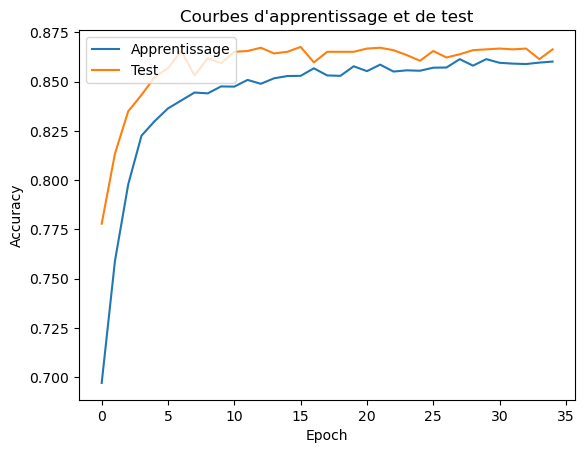

In [561]:
import matplotlib.pyplot as plt
# Courbes d'apprentissage et de test
plt.plot(history.history['accuracy']) # Courbe de training
plt.plot(history.history['val_accuracy']) # Courbe de validation
plt.title('Courbes d\'apprentissage et de test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()

In [562]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Taux de perte :', test_loss)
print('Taux de classification :', test_acc)

95/95 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8677
Taux de perte : 0.3502076268196106
Taux de classification : 0.867681086063385


In [563]:
from sklearn.metrics import confusion_matrix, classification_report

In [564]:
y_pred = model.predict(X_test)
y_true = y_test

# Créez la matrice de confusion
cm = confusion_matrix(y_true, np.round(y_pred))
print(cm)

# Calculez les métriques d'évaluation de modèle
report = classification_report(y_true, np.round(y_pred), target_names=['classe 0', 'classe 1'])

# Affichez le rapport de classification
print(report)

95/95 [==============================] - 0s 1ms/step
[[1926  150]
 [ 250  697]]
              precision    recall  f1-score   support

    classe 0       0.89      0.93      0.91      2076
    classe 1       0.82      0.74      0.78       947

    accuracy                           0.87      3023
   macro avg       0.85      0.83      0.84      3023
weighted avg       0.87      0.87      0.87      3023



# XGBoost

UTILISER UN GRIDSEARCH POUR BOUCLER SUR LES HYPERPARAMETRES

In [47]:
!pip install xgboost

     --------------------------------------- 70.9/70.9 MB 13.6 MB/s eta 0:00:00


In [42]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [43]:
model = xgb.XGBClassifier()

In [44]:
#Définir les paramètres de l'algorithme XGBoost
params = [{
    'max_depth': range(0, 11, 1),
    'eta': [i/4.0 for i in range(5)],
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss']
}]

In [45]:
# Création de l'objet de recherche de grille
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5)

In [46]:
grid_search.fit(X_train, y_train)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\AXEL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\AXEL\AppData\Local\Temp\ipykernel_3644\20025057.py", line 1, in <module>
    grid_search.fit(X_train, y_train)
  File "C:\Users\AXEL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\AXEL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 1392, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "C:\Users\AXEL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 838, in evaluate_candidates
    out = parallel(
  File "C:\Users\AXEL\anaconda3\lib\site-packages\joblib\parallel.py", line 1046, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\AXEL\anaconda3\lib\site-packages\joblib\parallel.py", line 861, 

TypeError: object of type 'NoneType' has no len()

In [ ]:
print('Meilleurs paramètres:', grid_search.best_params_)
print('Meilleur score:', grid_search.best_score_)

In [259]:
# Convertir les données d'entraînement et de test en format XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [260]:
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

In [261]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(dtest)
y_pred_binary = [round(value) for value in y_pred]

In [262]:
# Calculer la précision de la classification
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.22%


<AxesSubplot:>

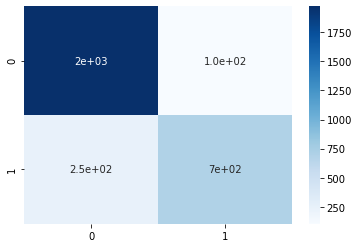

In [212]:
# Calculer la matrice de confusion et l'afficher avec Seaborn :

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_binary)

# Afficher la matrice de confusion avec Seaborn
sns.heatmap(cm, annot=True, cmap="Blues")


# Deuxième partie : Classification Multi-label

Option 1 : Une suite de Classifier Uni-Label
Autres options : 
https://scikit-learn.org/stable/modules/multiclass.html
https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5
CNN ?
Neural Network ?
Voir pour Keras ou Sk-learn